In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from utils.eval import score
from utils.models import CentroidSMOTE
from utils.models import KNNModel
from imblearn.over_sampling import SMOTE

In [3]:
directory = "../datasets/Datasets_Healthy_Older_People/S2_Dataset"
train_df = pd.DataFrame()
for filename in os.scandir(directory):
    if filename.name == 'README.txt':
        continue
    df = pd.read_csv(filename.path, sep =',', header = None)
    train_df = pd.concat([train_df, df])
print(train_df.shape,"in ",len(list(os.scandir(directory))) -1 , "files.")
print("done")

(22646, 9) in  27 files.
done


Dataset has no null or object values.

In [4]:
print(train_df.isnull().sum().sum(), train_df.isna().sum().sum())

0 0


In [5]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('float64'): 7, dtype('int64'): 2}


In [6]:
train_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [7]:
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
train_df, test_df = train_test_split(train_df, train_size = 0.9, random_state = 42) 
y_train = train_df[8]
y_test = test_df[8]
X_train = train_df.drop([8], axis = 1)
X_test = test_df.drop([8], axis = 1)

In [8]:
y_test.value_counts()

8
3    2059
1     115
2      56
4      35
Name: count, dtype: int64

In [9]:
pipeline = Pipeline([    ('classifier', KNNModel())])
parameters = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11]
}


In [10]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.933775
Error Rate: 0.06622516556291391
Precision: 0.817052
Recall: 0.503428
F1-score: 0.576454
Selectivity: 0.851991
Balanced Accuracy: 0.503428
Geometric Mean: 0.654917


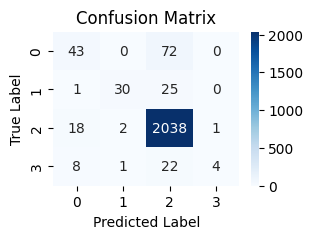

In [11]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1, scoring='accuracy')
best_clf = clf.fit(X = X_train, y = y_train)
score(X_test, y_test, best_clf)

Resampled dataset shape Counter({3: 18478, 2: 18478, 1: 18478, 4: 18478})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.894040
Error Rate: 0.10596026490066224
Precision: 0.566726
Recall: 0.653051
F1-score: 0.601555
Selectivity: 0.904262
Balanced Accuracy: 0.653051
Geometric Mean: 0.768459


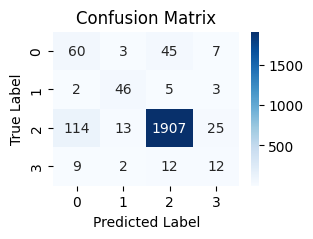

Resampled dataset shape Counter({3: 18478, 2: 18478, 1: 18478, 4: 18478})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.889625
Error Rate: 0.11037527593818985
Precision: 0.567997
Recall: 0.691849
F1-score: 0.615076
Selectivity: 0.914099
Balanced Accuracy: 0.691849
Geometric Mean: 0.795247


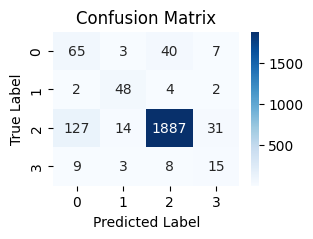

Resampled dataset shape Counter({3: 18478, 2: 18478, 1: 18478, 4: 18478})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.881678
Error Rate: 0.1183222958057395
Precision: 0.566019
Recall: 0.702605
F1-score: 0.613550
Selectivity: 0.918609
Balanced Accuracy: 0.702605
Geometric Mean: 0.803379


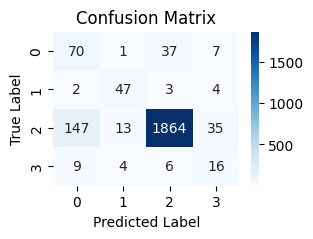

Resampled dataset shape Counter({3: 18478, 2: 18478, 1: 18478, 4: 18478})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.875055
Error Rate: 0.12494481236203092
Precision: 0.551085
Recall: 0.694626
F1-score: 0.599987
Selectivity: 0.915794
Balanced Accuracy: 0.694626
Geometric Mean: 0.797580


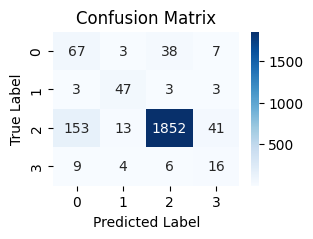

Resampled dataset shape Counter({3: 18478, 2: 18478, 1: 18478, 4: 18478})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.875497
Error Rate: 0.12450331125827818
Precision: 0.552518
Recall: 0.703821
F1-score: 0.603073
Selectivity: 0.920312
Balanced Accuracy: 0.703821
Geometric Mean: 0.804820


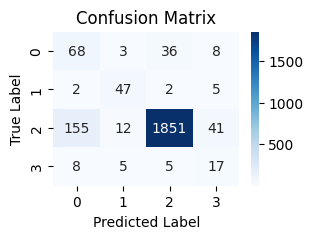

In [12]:
sm_list = []
from collections import Counter
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    pipeline = Pipeline([    ('classifier', KNNModel())])

    parameters = {
        'classifier__n_neighbors': [3, 5, 7, 9, 11]
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.893157
Error Rate: 0.10684326710816772
Precision: 0.580624
Recall: 0.640580
F1-score: 0.602486
Selectivity: 0.900687
Balanced Accuracy: 0.640580
Geometric Mean: 0.759580


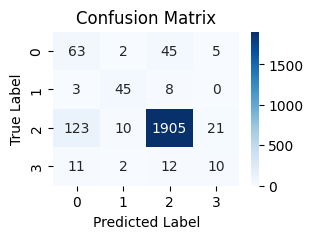

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.886976
Error Rate: 0.1130242825607064
Precision: 0.568920
Recall: 0.669818
F1-score: 0.606561
Selectivity: 0.908972
Balanced Accuracy: 0.669818
Geometric Mean: 0.780286


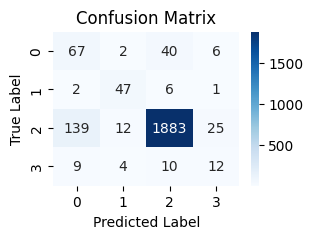

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.883444
Error Rate: 0.11655629139072843
Precision: 0.561446
Recall: 0.675004
F1-score: 0.602441
Selectivity: 0.912456
Balanced Accuracy: 0.675004
Geometric Mean: 0.784801


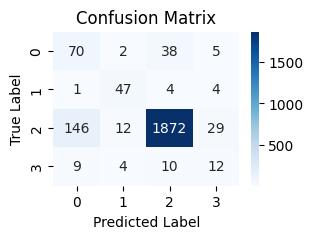

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.898896
Error Rate: 0.10110375275938188
Precision: 0.583721
Recall: 0.638203
F1-score: 0.604754
Selectivity: 0.900015
Balanced Accuracy: 0.638203
Geometric Mean: 0.757887


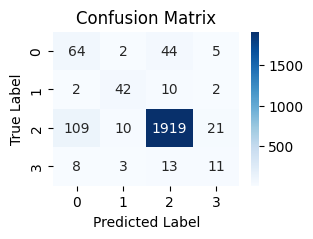

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.913024
Error Rate: 0.08697571743929355
Precision: 0.662009
Recall: 0.655506
F1-score: 0.650833
Selectivity: 0.899268
Balanced Accuracy: 0.655506
Geometric Mean: 0.767773


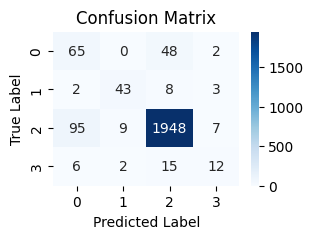

In [13]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))

for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)